In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

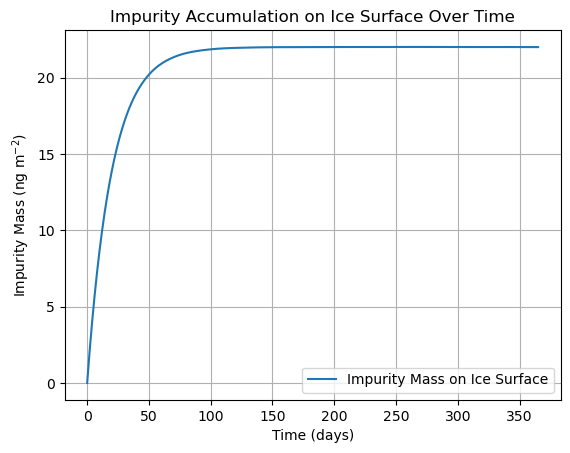

In [4]:
# Define the differential equation for impurity accumulation
def impurity_accumulation(
    t,
    y,
    atmospheric_distant_source_rate,
    atmospheric_local_source_rate,
    engacial_impurity_flow_rate,
    biological_source_rate,
    impurity_removal_rate,
    snow_depth,
):
    impurity_mass = y
    if snow_depth > 0:
        # No impurity accumulation on the ice surface, only within the snowpack
        return 0
    else:
        # Impurity accumulation on the ice surface when there is no snow
        return (
            atmospheric_distant_source_rate(t)
            + atmospheric_local_source_rate(t)
            + engacial_impurity_flow_rate(t)
            + biological_source_rate(t)
            - impurity_removal_rate(t) * impurity_mass
        )


# Example rates as functions (replace these with actual data or functions)
def atmospheric_distant_source_rate(t):
    return 0.5  # Replace with actual function or data


def atmospheric_local_source_rate(t):
    return 0.3  # Replace with actual function or data


def engacial_impurity_flow_rate(t):
    return 0.2  # Replace with actual function or data


def biological_source_rate(t):
    return 0.1  # Replace with actual function or data


def impurity_removal_rate(t):
    return 0.05  # Replace with actual function or data


snow_depth = 0  # Example snow depth, change as needed

# Initial condition (initial impurity mass on ice surface)
initial_impurity_mass = 0.0  # Initial mass of impurities on the ice surface, ng m^-2

# Time span for the simulation
t_span = (0, 365)  # For example, one year
t_eval = np.linspace(t_span[0], t_span[1], 365)  # Evaluate daily

# Solve the differential equation
sol = solve_ivp(
    impurity_accumulation,
    t_span,
    [initial_impurity_mass],
    args=(
        atmospheric_distant_source_rate,
        atmospheric_local_source_rate,
        engacial_impurity_flow_rate,
        biological_source_rate,
        impurity_removal_rate,
        snow_depth,
    ),
    t_eval=t_eval,
)

# Plot the results
plt.figure()
plt.plot(sol.t, sol.y[0], label="Impurity Mass on Ice Surface")
plt.xlabel("Time (days)")
plt.ylabel("Impurity Mass (ng m$^{-2}$)")
plt.title("Impurity Accumulation on Ice Surface Over Time")
plt.legend()
plt.grid(True)
plt.show()